In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [2]:
def get_data_csv(link, date):
    PATH = "/Users/marco/Documents/chromedriver"
    browser = webdriver.Chrome(PATH)
    wait = WebDriverWait(browser, 10)
    browser.get(link)

    search = browser.find_element_by_id("input-cosd")
    time.sleep(1)
    search.clear()
    time.sleep(1)
    search.send_keys(date)
    search.send_keys(Keys.RETURN)

    dlButton = browser.find_element_by_id("download-button")
    dlButton.click()
    wait.until(lambda driver: browser.execute_script("return $('#download-data-csv').attr('href') != '#'"))
    dlButton = browser.find_element_by_id("download-data-csv")
    csv_download_url = dlButton.get_attribute('href')
    csv_data = pd.read_csv(csv_download_url)
    browser.close()
    return csv_data


In [3]:
link_inflation = "https://fred.stlouisfed.org/series/T10YIE"
link_tips = "https://fred.stlouisfed.org/series/DTP10J30"
link_treasury = "https://fred.stlouisfed.org/series/DGS10"
date = '2020-02-20'
inflation_10y = get_data_csv(link_inflation, date)
tips_10y = get_data_csv(link_tips, date)
treasury_10y = get_data_csv(link_treasury, date)


In [4]:
# get inflation
inflation_10y[inflation_10y.iloc[:, 1:2] == '.'] = None
inflation_10y = inflation_10y.dropna()
inflation = inflation_10y.iloc[:, 1:2].apply(pd.to_numeric, errors='coerce')
inflation = np.array(inflation)

In [5]:
# get dates
dates = inflation_10y.iloc[:, 0:1]
dates = dates.values.tolist()
#dates = pd.to_datetime(dates).dt.strftime("%d/%m/%y")
#dates = dates.apply(pd.to_datetime)
d = [i+1 for i in range(len(dates))]

In [6]:
# get tips
tips_10y[tips_10y.iloc[:, 1:2] == '.'] = None
tips_10y = tips_10y.dropna()
tips = tips_10y.iloc[:, 1:2].apply(pd.to_numeric, errors='coerce')
tips = np.array(tips)
tips = tips[:-1].copy()

In [7]:
# get treasury
treasury_10y[treasury_10y.iloc[:, 1:2] == '.'] = None
treasury_10y = treasury_10y.dropna()
treasury = treasury_10y.iloc[:, 1:2].apply(pd.to_numeric, errors='coerce')
treasury = np.array(treasury)

In [8]:
# get differential tresury - tips
tnotes_tips_diff = treasury - tips

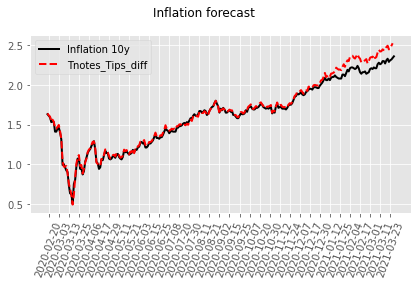

In [10]:
# plot the graph
fig, ax = plt.subplots()
plt.plot(inflation, '-k', linewidth=2, label='Inflation 10y')
plt.plot(tnotes_tips_diff, '--r', linewidth=2, label='Tnotes_Tips_diff')
plt.xticks(d, [str(dates[i])[2:12] for i in range(len(dates))], rotation=70)
plt.locator_params(axis='x', nbins=35)
plt.legend(loc='upper left')
plt.suptitle('Inflation forecast ')
plt.tight_layout()
plt.show()